In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
household_df = pd.read_csv('household_power_consumption.csv')

In [104]:
dataset_size = household_df.shape
print('There are  = {0} rows and {1} columns'.format(dataset_size[0], dataset_size[1]))
household_df.head()

There are  = 2075259 rows and 9 columns


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [0]:
for feature in household_df.columns[2:]:
    household_df[feature][household_df[feature] == '?'] = np.NaN
    household_df[feature] = household_df[feature].astype(float)

In [0]:
household_df['Energy_consumed'] = household_df['Global_active_power'] * 1000 / 60 - household_df['Sub_metering_1'] - household_df['Sub_metering_2'] - household_df['Sub_metering_3']

In [0]:
household_df.interpolate(inplace=True)

In [0]:
def get_numerical_distribution(variable):
    g = sns.FacetGrid(household_df, height=7)
    g = g.map(sns.distplot, variable)

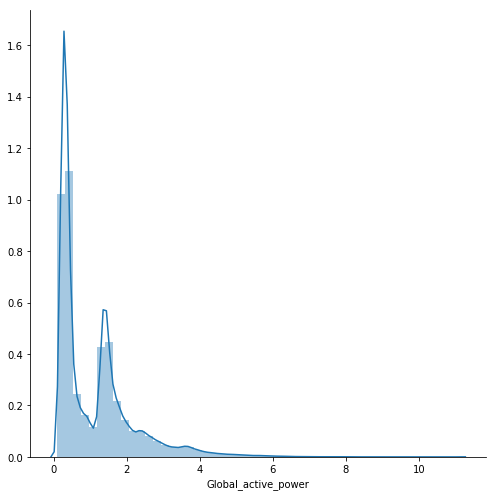

In [109]:
get_numerical_distribution('Global_active_power')

As you can see, the distribution has a heavy right tail. It's a good idea to transform it to log(x)

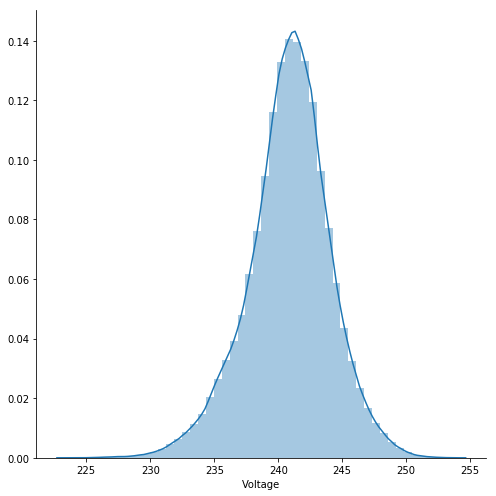

In [110]:
get_numerical_distribution('Voltage')

The distribution of this feature is most likely to be normal

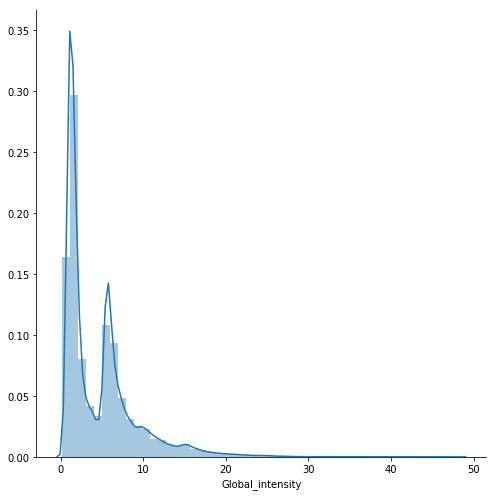

In [111]:
get_numerical_distribution('Global_intensity')

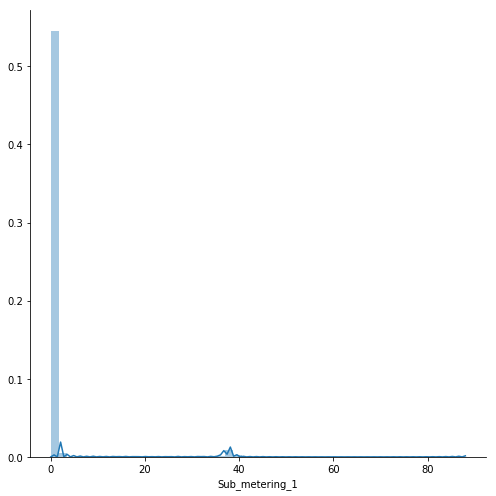

In [112]:
get_numerical_distribution('Sub_metering_1')

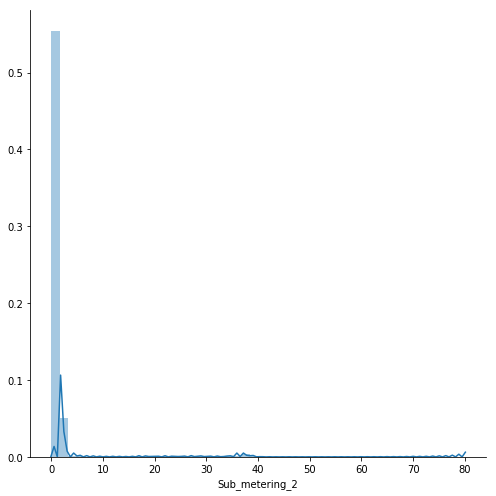

In [113]:
get_numerical_distribution('Sub_metering_2')

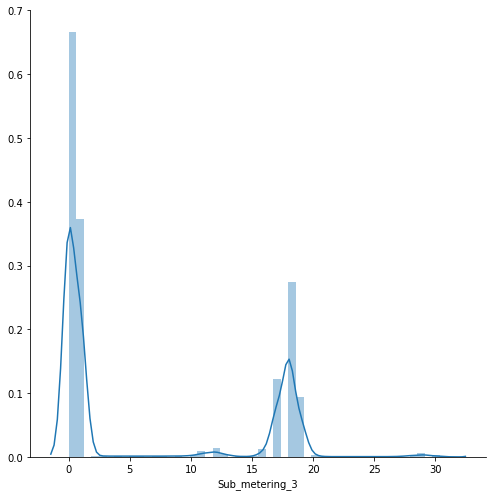

In [114]:
get_numerical_distribution('Sub_metering_3')

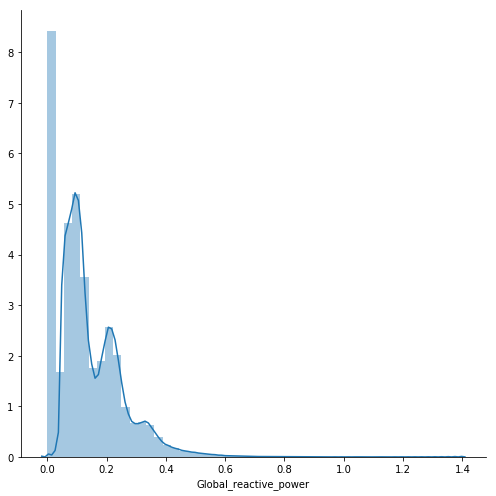

In [115]:
get_numerical_distribution('Global_reactive_power')

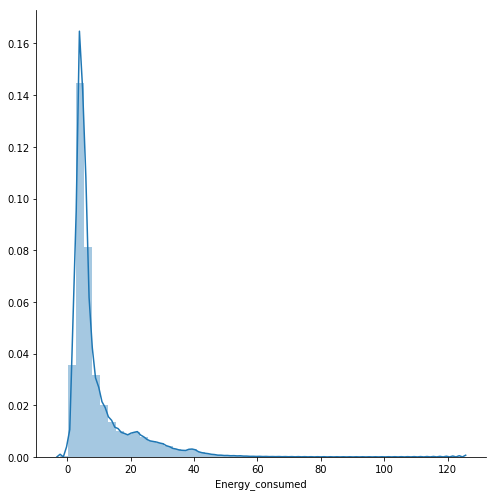

In [116]:
get_numerical_distribution('Energy_consumed')

All features expect 'voltage' has a heavy right tail.

In [0]:
daily_group = household_df.groupby(by='Date', sort=False).aggregate(np.mean)

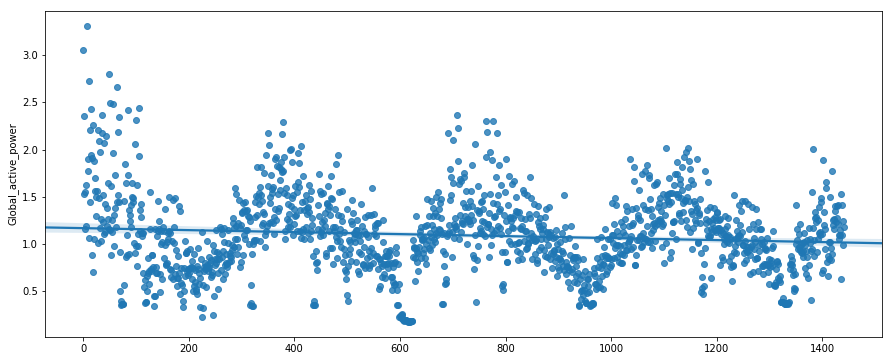

In [118]:
plt.figure(figsize=(15, 6))
sns.regplot(x=np.arange(daily_group.shape[0]), y=daily_group['Global_active_power']);

It's a seasonal trend and you can see that energy consumption is decreasing

In [119]:
dates = household_df[(household_df['Date'] == '1/2/2008') | (household_df['Date'] == '2/2/2008')].reset_index().drop(columns=['index'])
dates.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumed
0,1/2/2008,00:00:00,2.268,0.184,239.79,9.4,0.0,0.0,18.0,19.800000
1,1/2/2008,00:01:00,2.210,0.188,240.70,9.2,0.0,0.0,17.0,19.833333
2,1/2/2008,00:02:00,2.270,0.184,239.96,9.4,0.0,0.0,18.0,19.833333
3,1/2/2008,00:03:00,2.238,0.182,239.63,9.4,0.0,0.0,18.0,19.300000
4,1/2/2008,00:04:00,2.204,0.184,240.11,9.2,0.0,0.0,17.0,19.733333


In [0]:
def get_lineplot(variable):
    plt.figure(figsize=(15, 8))
    return sns.lineplot(x=np.arange(dates.shape[0]), y=dates[variable])

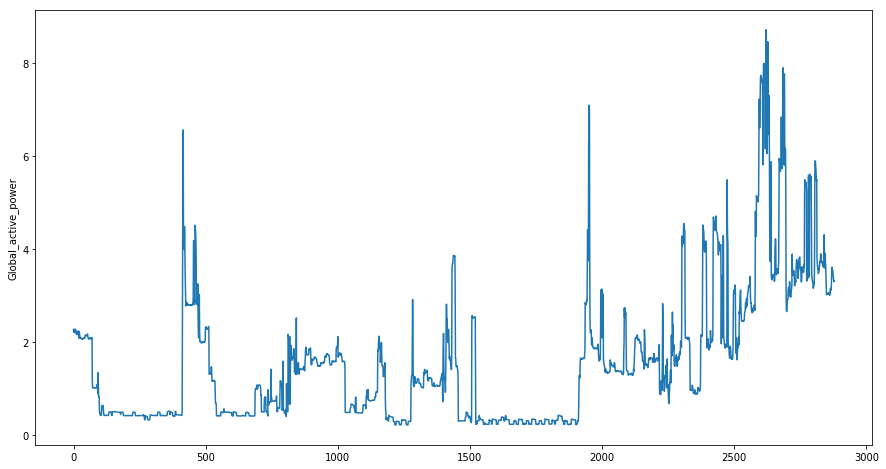

In [121]:
get_lineplot('Global_active_power');

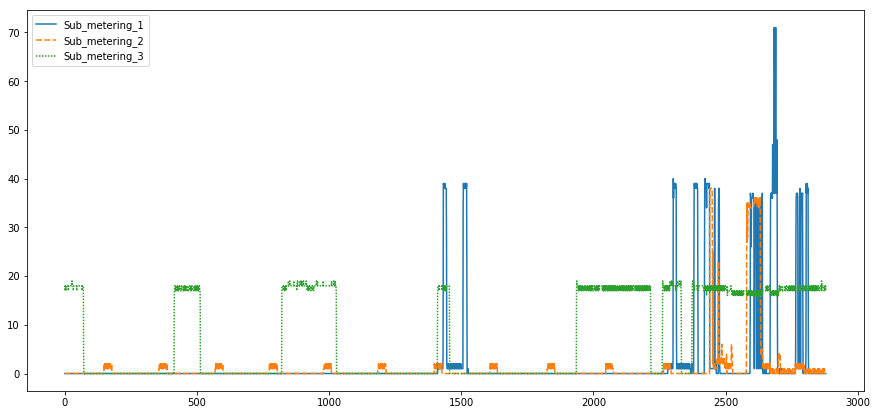

In [122]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=dates.iloc[:, -4:-1]);

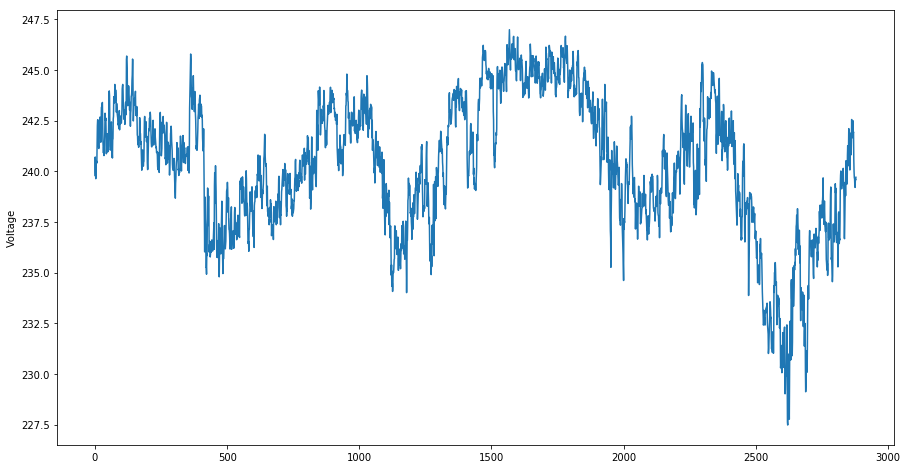

In [123]:
get_lineplot('Voltage');

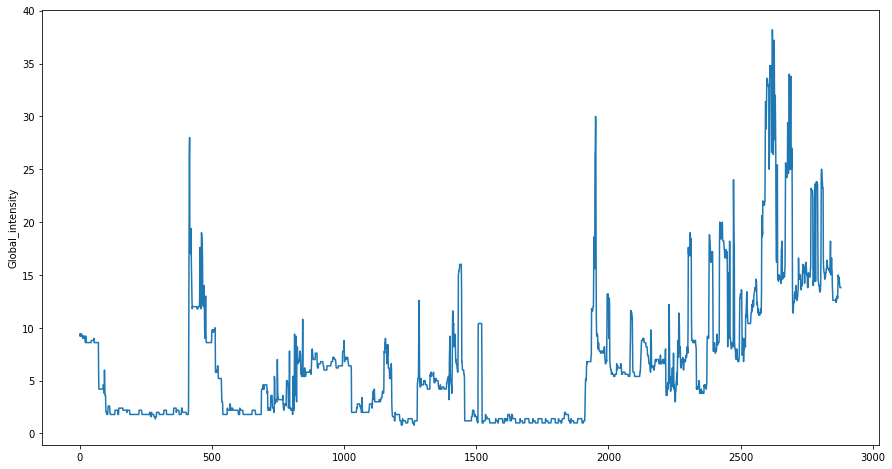

In [124]:
get_lineplot('Global_intensity');

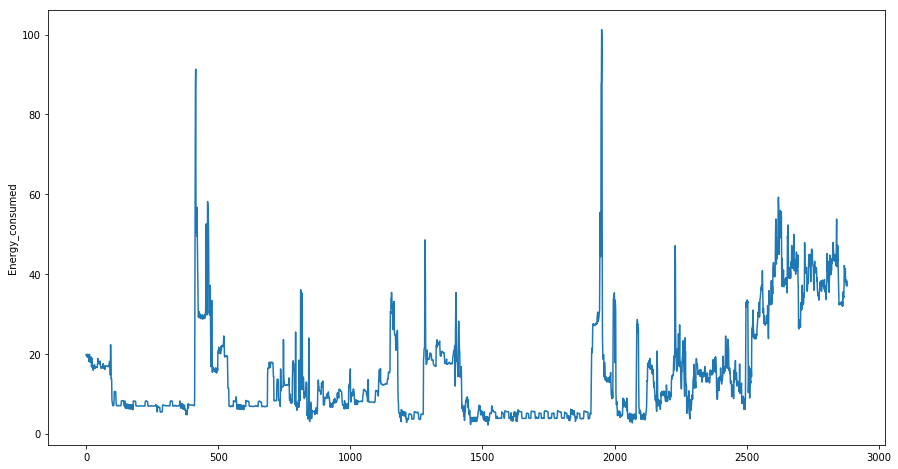

In [125]:
get_lineplot('Energy_consumed');

In [0]:
def detect_outliers(data,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [127]:
print('Abnormal dates(Voltage)\n', detect_outliers(daily_group, 0, ['Voltage']))
print('\nAbnormal dates(Current)\n', detect_outliers(daily_group, 0, ['Global_intensity']))

Abnormal dates(Voltage)
 ['16/12/2006', '23/4/2007', '24/4/2007', '25/4/2007', '26/4/2007', '27/4/2007', '28/4/2007', '29/4/2007', '30/4/2007', '1/5/2007', '2/5/2007', '3/5/2007', '4/5/2007', '5/5/2007', '6/5/2007', '7/5/2007', '8/5/2007', '9/5/2007', '10/5/2007', '11/5/2007', '12/5/2007', '13/5/2007', '14/5/2007', '15/5/2007', '16/5/2007', '17/5/2007', '18/5/2007', '19/5/2007', '20/5/2007', '21/5/2007', '22/5/2007', '23/5/2007', '24/5/2007', '25/5/2007', '26/5/2007', '27/5/2007', '28/5/2007', '29/5/2007', '30/5/2007', '31/5/2007', '1/6/2007', '2/6/2007', '3/6/2007', '4/6/2007', '5/6/2007', '6/6/2007', '7/6/2007', '8/6/2007', '16/7/2007', '17/7/2007', '18/7/2007', '19/7/2007', '20/7/2007', '21/7/2007', '22/7/2007', '23/7/2007', '24/7/2007', '25/7/2007', '26/7/2007', '27/7/2007', '28/7/2007', '29/7/2007', '30/7/2007', '31/7/2007', '1/8/2007', '2/8/2007', '3/8/2007', '4/8/2007', '5/8/2007', '6/8/2007', '7/8/2007', '8/8/2007', '9/8/2007', '10/8/2007', '11/8/2007', '12/8/2007', '13/8/2007'

In [0]:
date_variables = pd.DataFrame(household_df['Date'].str.split('/').tolist(), columns=['Day','Month', 'Year'], dtype=float)
time_variables = pd.DataFrame(household_df['Time'].str.split(':').tolist(), columns=['Hours', 'Minutes', 'Sec'], dtype=float).drop(columns=['Sec'])
df = pd.concat((date_variables, time_variables))

In [0]:

date_variables['Day_sin'] = np.sin(2 * np.pi * date_variables['Day'] / date_variables['Day'].max())
date_variables['Day_cos'] = np.cos(2 * np.pi * date_variables['Day'] / date_variables['Day'].max())
date_variables['Month_sin'] = np.sin(2 * np.pi * date_variables['Month'] / date_variables['Month'].max())
date_variables['Month_cos'] = np.cos(2 * np.pi * date_variables['Month'] / date_variables['Month'].max())
date_variables['Year'] = date_variables['Year'] - date_variables['Year'].min()

time_variables['Hours_sin'] = np.sin(2 * np.pi * time_variables['Hours'] / time_variables['Hours'].max())
time_variables['Hours_cos'] = np.cos(2 * np.pi * time_variables['Hours'] / time_variables['Hours'].max())
time_variables['Minutes_sin'] = np.sin(2 * np.pi * time_variables['Minutes'] / time_variables['Minutes'].max())
time_variables['Minutes_cos'] = np.cos(2 * np.pi * time_variables['Minutes'] / time_variables['Minutes'].max())


In [0]:
trigonometric_features = date_variables.merge(time_variables, left_index=True, right_index=True).drop(columns=['Day', 'Month', 'Hours', 'Minutes'])
new_df = household_df.drop(['Date', 'Time'], axis=1)

In [0]:
PERIODS = 4

In [0]:
for i in range(1, PERIODS + 1): 
    new_df[f'GAP_{i}'] = new_df['Global_active_power'].shift(periods=i)
new_df.dropna(inplace=True)

In [0]:
scaler = StandardScaler().fit(new_df)
new_df = pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)
new_df = new_df.merge(trigonometric_features, left_index=True, right_index=True)

In [0]:
X = new_df.drop(columns=['Global_active_power'])
y = new_df['Global_active_power']

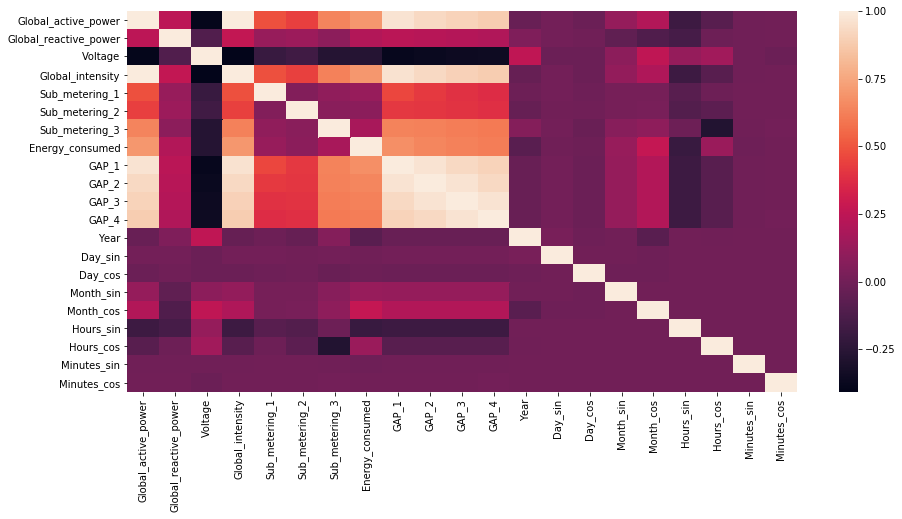

In [137]:
plt.figure(figsize=(15, 7))
sns.heatmap(new_df.corr());

In [0]:
household_df.profile_report()